<b>Data Description</b>:<br>
The Pima Indians Diabetes Dataset is a widely-used dataset in machine learning and statistics. The dataset contains information on 768 women of Pima Indian heritage, who were at least 21 years old and living near Phoenix, Arizona. The data was collected by the US National Institute of Diabetes and Digestive and Kidney Diseases.<br>
The dataset contains 8 attributes (predictors) and a target variable (outcome).<br>
The attributes are:<br>
1.	Pregnancies: number of times pregnant
2.	Glucose: plasma glucose concentration a 2 hours in an oral glucose tolerance test
3.	BloodPressure: diastolic blood pressure (mm Hg)
4.	SkinThickness: triceps skin fold thickness (mm)
5.	Insulin: 2-hour serum insulin (mu U/ml)
6.	BMI: body mass index (weight in kg/(height in m)^2)
7.	DiabetesPedigreeFunction: diabetes pedigree function
8.	Age: age in years

The target variable is a binary variable indicating whether or not the patient developed diabetes within 5 years of the data collection. The positive class indicates presence of diabetes, while the negative class or 0 indicates the absence of diabetes.


### Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
df = pd.read_excel(r"D:\Datasets\diabetes.xlsx")

### Basic Analysis

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* Observed that no null values are there

In [8]:
Columns = df.columns

In [9]:
Columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
for i in Columns:
    print(i,end = " ")
    print(df.loc[lambda df : df[i] == 0].shape[0])

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


Average Glucose in blood level for humans is *80-180 mg/dl*.<br>
Average blood pressure is *120/80 mmHg*.<br>
It is not possible to have 0 values in <b>Glucose,
BloodPressure,
SkinThickness,
Insulin,
BMI</b>. 




In [11]:
Fill_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

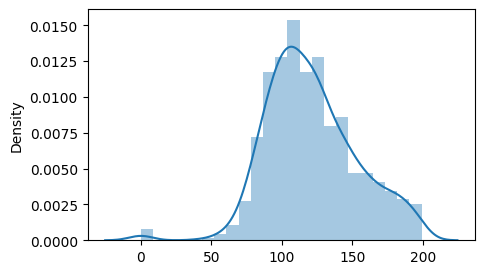

In [12]:
plt.figure(figsize=(5,3))
sns.distplot(x = df["Glucose"]);


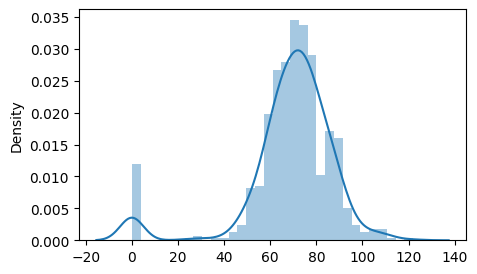

In [13]:
plt.figure(figsize=(5,3))
sns.distplot(x = df["BloodPressure"]);

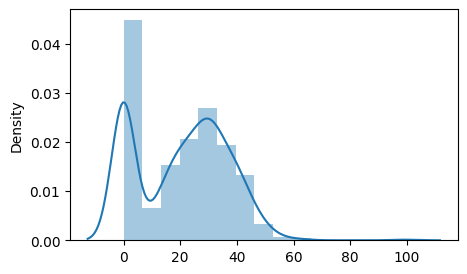

In [14]:
plt.figure(figsize=(5,3))
sns.distplot(x = df["SkinThickness"]);

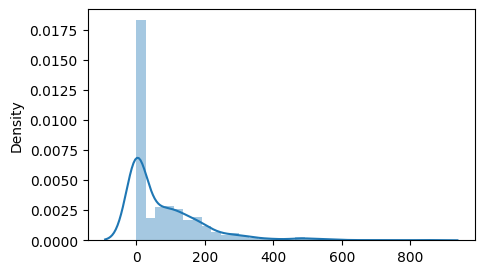

In [15]:
plt.figure(figsize=(5,3))
sns.distplot(x = df["Insulin"]);

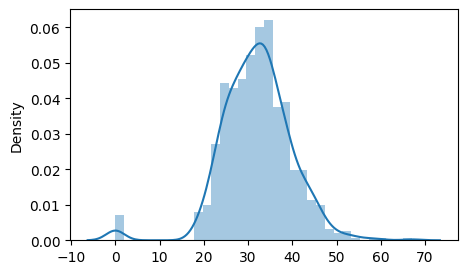

In [16]:
plt.figure(figsize=(5,3))
sns.distplot(x = df["BMI"]);

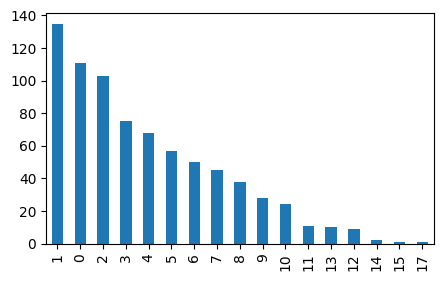

In [17]:
plt.figure(figsize=(5,3))
df.Pregnancies.value_counts().plot(kind="bar");

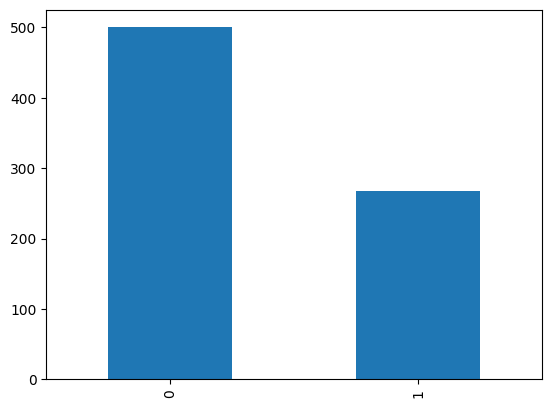

In [18]:
df.Outcome.value_counts().plot(kind="bar");

### Filling the Values

In [19]:
# Avg = df.groupby('Outcome').mean().T T is transpose

# def filling_mean(df,Avg,i):
#     col_name = df[i]
#     mean = Avg.loc[i,:]
#     col0_index = df.loc[lambda df : (col_name == 0) & (df["Outcome"] == 0)].index
#     col1_index = df.loc[lambda df : (col_name == 0) & (df["Outcome"] == 1)].index
#     for i in col0_index:
#         col_name.iloc[i] = mean[0]
#     for i in col1_index:
#         col_name.iloc[i] = mean[1]
#     return df.loc[lambda df : col_name == 0].shape[0]

# for i in Fill_col:
#     print("Before filling zero:",i,df.loc[lambda df : df[i] == 0].shape[0])
#     print("After filling zero:",i,filling_mean(df,Avg,i))

**Replacing the 0's with np.nan**

In [20]:
for i in Fill_col:
    df[i].mask(df[i] == 0,np.nan,inplace=True)

In [21]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [22]:
df.isna().sum().sum()

652

  * Total 652 Null values did'nt change for pregnancies because it possible to have 0

**Using iterative imputer to impute values**

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [24]:
Iter_impute = IterativeImputer()

In [25]:
for i in Fill_col:
    df[[i]] = Iter_impute.fit_transform(df[[i]])

In [26]:
df.isna().sum().sum()

0

### Correlation

In [27]:
crr = df.corr()

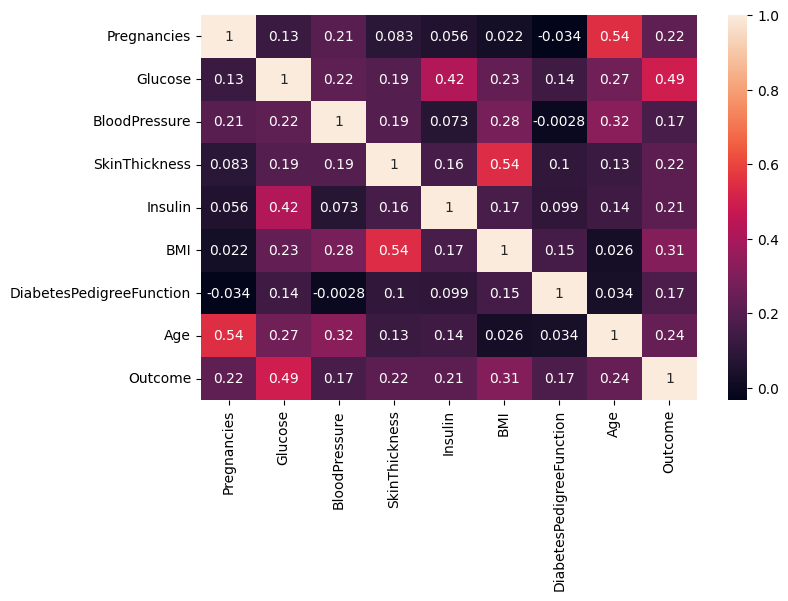

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(crr,annot=True);

* Glucose, BMI, Age are highly correlated with outcome
* Pregnancies is highly correlated with outcome
* Glucose is highly correlated with insulin
* Skinthinkness is highly correlated with Bmi

### Outlier Analysis & Removal

In [29]:
Fill_col+=["Pregnancies","DiabetesPedigreeFunction","Age"]

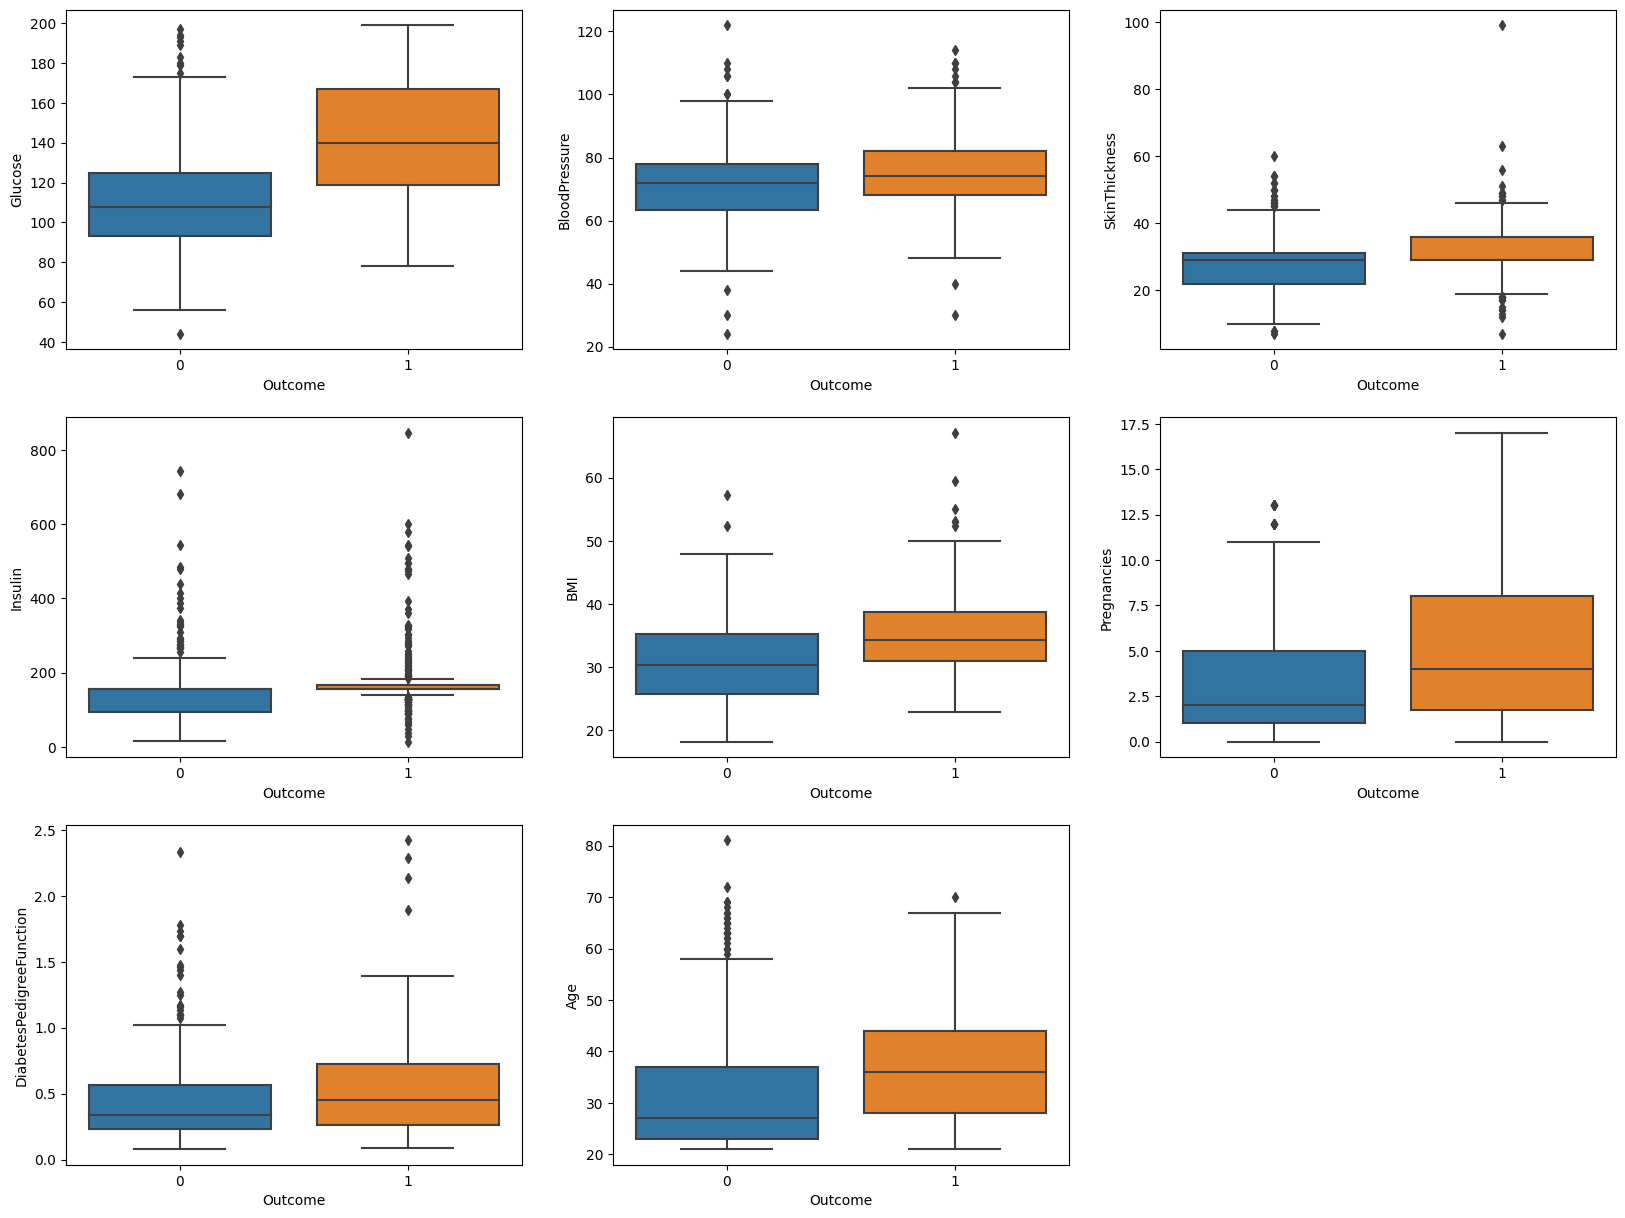

In [30]:
plt.figure(figsize=(20,15))
for j,i in enumerate(Fill_col):
    plt.subplot(3,3,j+1)
    sns.boxplot(x = "Outcome", y = df[i], data = df)

In [31]:
def Outl_removal(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5*iqr)
    high = q3 + (1.5*iqr)
    return low,high

In [32]:
lower, upper = Outl_removal(df,"Insulin")
print("Total no of Outliers in ","Insulin", df[(df["Insulin"]<lower) | (df["Insulin"]>upper)].shape[0])

Total no of Outliers in  Insulin 164


* We have a data of around 768 in that 164 records are ouliers for insulin so, i choose to neglect insulin and perform outlier removal

In [33]:
Fill_col.remove("Insulin")

In [34]:
Fill_col

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'Pregnancies',
 'DiabetesPedigreeFunction',
 'Age']

In [35]:
for i in Fill_col:
    lower, upper = Outl_removal(df,i)
    print("Total no of Outliers in ",i, df[(df[i]<lower) | (df[i]>upper)].shape[0])
    df = df[(df[i]>lower) & (df[i]<upper)]

Total no of Outliers in  Glucose 0
Total no of Outliers in  BloodPressure 14
Total no of Outliers in  SkinThickness 85
Total no of Outliers in  BMI 6
Total no of Outliers in  Pregnancies 4
Total no of Outliers in  DiabetesPedigreeFunction 27
Total no of Outliers in  Age 9


In [36]:
df.shape[0]

620

* Around 148 ouliers are removed

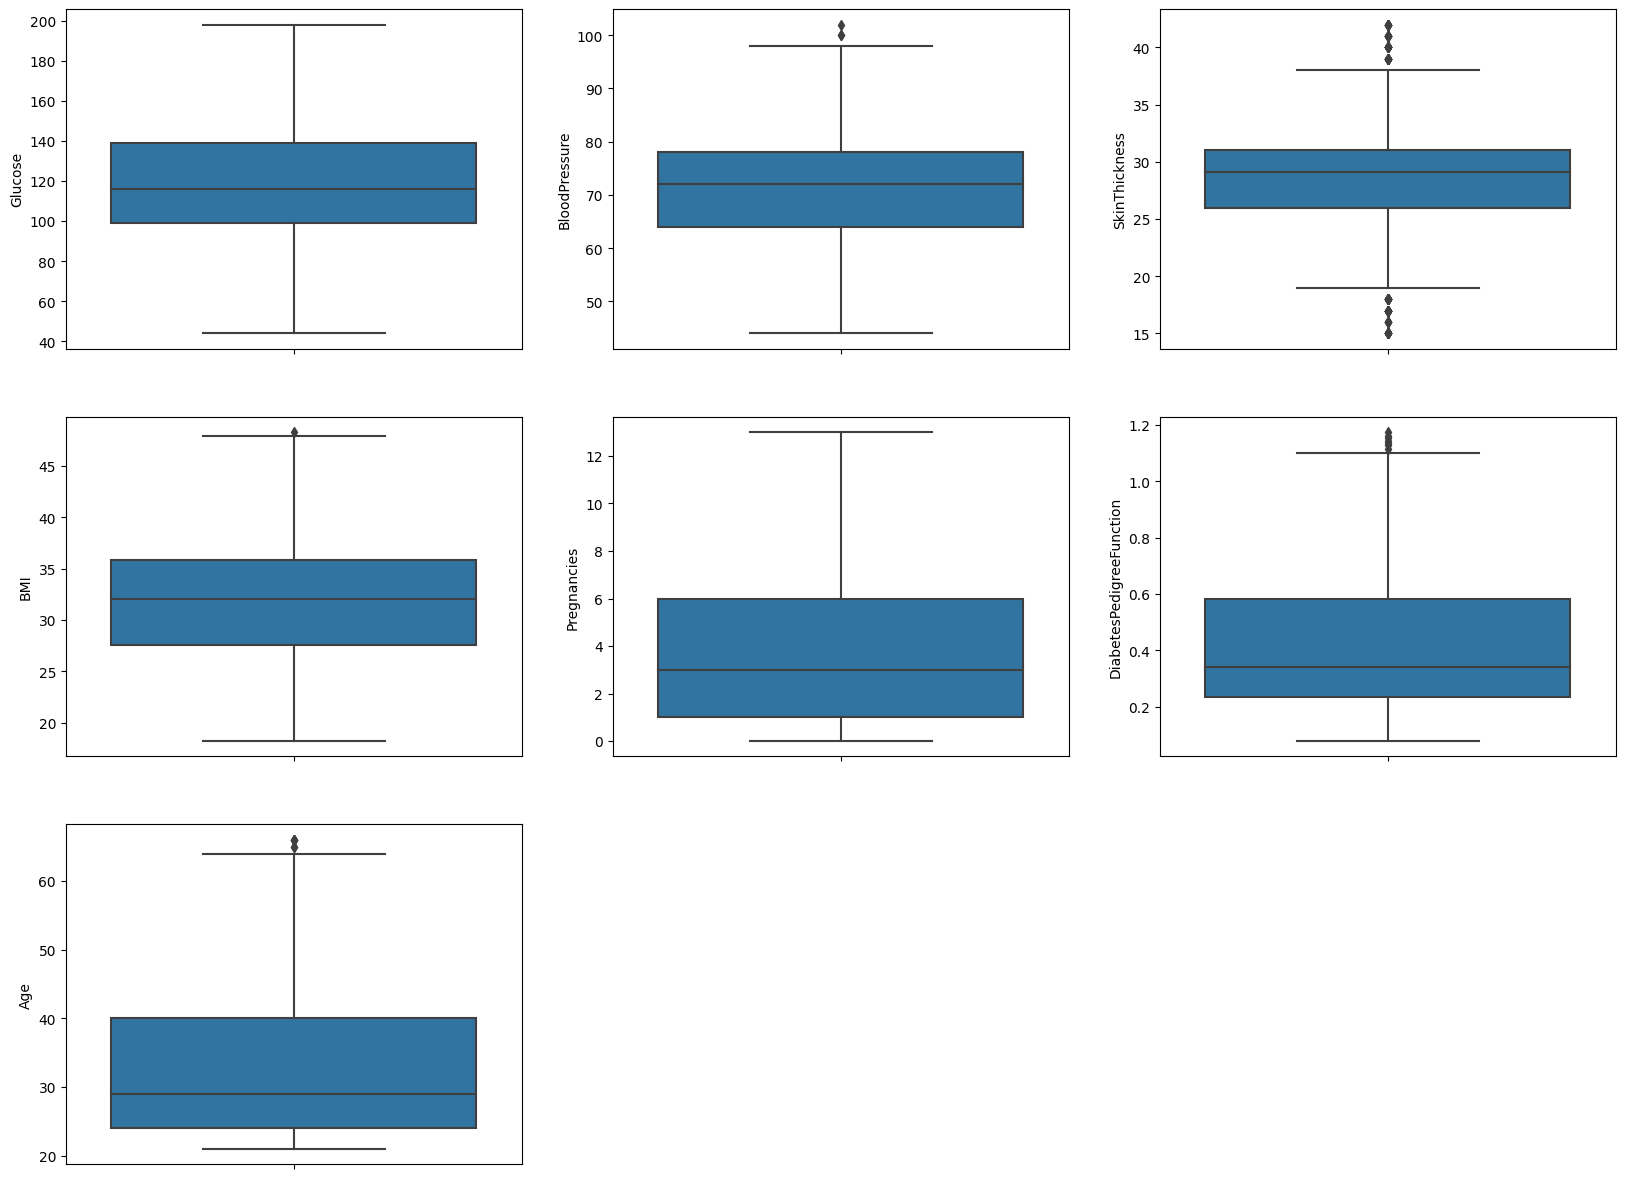

In [37]:
plt.figure(figsize=(20,15))
for j,i in enumerate(Fill_col):
    plt.subplot(3,3,j+1)
    sns.boxplot( y = df[i], data = df)

### Spliting dataset

In [38]:
X = df.drop("Outcome",axis = 1)
Y = df.Outcome

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,Y)

### Feature Scaling & Splitting of data

In [40]:
X = df.drop("Outcome",axis = 1)
Y = df.Outcome

In [41]:
from sklearn.preprocessing import StandardScaler
Scaling = StandardScaler(with_mean=False) # without centering the data

In [42]:
X = Scaling.fit_transform(X)

In [43]:
X

array([[1.85105441, 4.99706868, 6.84360906, ..., 5.54450944, 2.56090767,
        4.49379087],
       [0.30850907, 2.86993809, 6.2733083 , ..., 4.38940331, 1.43361817,
        2.78615034],
       [2.46807255, 6.1788079 , 6.08320805, ..., 3.84485327, 2.74470487,
        2.87602616],
       ...,
       [1.54254534, 4.08544129, 6.84360906, ..., 4.32339724, 1.00067365,
        2.69627452],
       [0.30850907, 4.25426118, 5.70300755, ..., 4.96695637, 1.4254494 ,
        4.22416342],
       [0.30850907, 3.14004992, 6.6535088 , ..., 5.01646092, 1.28658041,
        2.0671438 ]])

In [44]:
X.shape

(620, 8)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [46]:
print("x_train:{},x_test:{}, y_train:{}, y_test:{}".format(x_train.shape,x_test.shape, y_train.shape, y_test.shape))

x_train:(496, 8),x_test:(124, 8), y_train:(496,), y_test:(124,)


### Modelling
<h6>Logistic Regression</h6>

In [47]:
from sklearn.linear_model import LogisticRegression
lg_regression = LogisticRegression(max_iter=1000,random_state=40)
lg_regression.fit(x_train,y_train);

In [48]:
lg_reg_predict = lg_regression.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_test, lg_reg_predict)
print('Logistic regression accuracy = {:.4f}%'.format(logistic_acc*100))

Logistic regression accuracy = 76.6129%


In [50]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,lg_reg_predict)
print(conf_mat)
from sklearn.metrics import classification_report
print(classification_report(y_test, lg_reg_predict))

[[75  9]
 [20 20]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        84
           1       0.69      0.50      0.58        40

    accuracy                           0.77       124
   macro avg       0.74      0.70      0.71       124
weighted avg       0.76      0.77      0.75       124



<h6>Support Vector Machine</h6>

In [51]:
from sklearn.svm import SVC
SVM = SVC(kernel="poly",C=2.5,probability = True)
SVM.fit(x_train,y_train)

SVC(C=2.5, kernel='poly', probability=True)

In [52]:
SVM_predict = SVM.predict(x_test)

In [53]:
SVM_acc = accuracy_score(y_test, SVM_predict)
print('Support Vector Machine accuracy ={:.4f}%'.format(SVM_acc*100))

Support Vector Machine accuracy =79.8387%


In [54]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,SVM_predict)
print(conf_mat)
from sklearn.metrics import classification_report
print(classification_report(y_test, SVM_predict))

[[77  7]
 [18 22]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        84
           1       0.76      0.55      0.64        40

    accuracy                           0.80       124
   macro avg       0.78      0.73      0.75       124
weighted avg       0.79      0.80      0.79       124



<h6>KNearestNeighbour</h6>

In [55]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
KNN_predict = KNN.predict(x_test)

In [57]:
KNN_acc = accuracy_score(y_test, KNN_predict)
print('KNeighborsClassifier accuracy = {:.4f}%'.format(KNN_acc*100))

KNeighborsClassifier accuracy = 72.5806%


In [58]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,KNN_predict)
print(conf_mat)
from sklearn.metrics import classification_report
print(classification_report(y_test, KNN_predict))

[[67 17]
 [17 23]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        84
           1       0.57      0.57      0.57        40

    accuracy                           0.73       124
   macro avg       0.69      0.69      0.69       124
weighted avg       0.73      0.73      0.73       124



<h6>DecisionTree</h6>

In [59]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=173,criterion="entropy",random_state=42)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=173, random_state=42)

In [60]:
DTC_predict = DTC.predict(x_test)

In [61]:
DTC_acc = accuracy_score(y_test, DTC_predict)
print('DecisionTree accuracy = {:.4f}%'.format(DTC_acc*100))

DecisionTree accuracy = 73.3871%


In [62]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,DTC_predict)
print(conf_mat)
from sklearn.metrics import classification_report
print(classification_report(y_test, DTC_predict))

[[66 18]
 [15 25]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        84
           1       0.58      0.62      0.60        40

    accuracy                           0.73       124
   macro avg       0.70      0.71      0.70       124
weighted avg       0.74      0.73      0.74       124



<h4>RandomForest</h4>

In [63]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
RFC_predict = RFC.predict(x_test)

In [65]:
RFC_acc = accuracy_score(y_test, RFC_predict)
print('Random Forest accuracy = {:.4f}%'.format(RFC_acc*100))

Random Forest accuracy = 83.0645%


In [66]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,RFC_predict)
print(conf_mat)
from sklearn.metrics import classification_report
print(classification_report(y_test, RFC_predict))

[[77  7]
 [14 26]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        84
           1       0.79      0.65      0.71        40

    accuracy                           0.83       124
   macro avg       0.82      0.78      0.80       124
weighted avg       0.83      0.83      0.83       124



**Hyperparameter Tuning**

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {
    'bootstrap': [True], # resampling technique to reduce variance
    'max_depth': [80, 90, 100, 110,150], # max levels it can go
    'max_features': [2, 3], # no of features to select
    'min_samples_leaf': [3, 4, 5], # no of samples in the node
    'min_samples_split': [8, 10, 12], # minimum no of samples required to split a node
    'n_estimators': [100, 200, 300, 1000] # No of trees
}

In [69]:
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [70]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [80, 90, 100, 110, 150],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [71]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [72]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=4,
                       min_samples_split=10)

In [73]:
RFC_hy = best_grid.predict(x_test)

In [74]:
RFC_hy_acc = accuracy_score(y_test, RFC_hy)
print('Random Forest with hyperparameter tuning accuracy = {:.4f}%'.format(RFC_hy_acc*100))

Random Forest with hyperparameter tuning accuracy = 81.4516%


In [75]:
conf_mat = confusion_matrix(y_test,RFC_hy)
print(conf_mat)
from sklearn.metrics import classification_report
print(classification_report(y_test, RFC_hy))

[[77  7]
 [16 24]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        84
           1       0.77      0.60      0.68        40

    accuracy                           0.81       124
   macro avg       0.80      0.76      0.77       124
weighted avg       0.81      0.81      0.81       124



<h6>MLP Classifier</h6>

In [76]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=1000,activation="tanh",learning_rate_init=0.0001)
MLP.fit(x_train,y_train)

MLPClassifier(activation='tanh', learning_rate_init=0.0001, max_iter=1000)

In [77]:
MLP_predict = MLP.predict(x_test)

In [78]:
MLP_acc = accuracy_score(y_test, MLP_predict)
print('MLP Classifier accuracy ={:.4f}%'.format(MLP_acc*100))

MLP Classifier accuracy =76.6129%


In [79]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,MLP_predict)
print(conf_mat)
from sklearn.metrics import classification_report
print(classification_report(y_test, MLP_predict))

[[74 10]
 [19 21]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        84
           1       0.68      0.53      0.59        40

    accuracy                           0.77       124
   macro avg       0.74      0.70      0.71       124
weighted avg       0.76      0.77      0.76       124



**AdaBoost**

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
ADC = AdaBoostClassifier(base_estimator=SVM,learning_rate=0.1,n_estimators=13,random_state=42)

In [82]:
ADC.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=SVC(C=2.5, kernel='poly', probability=True),
                   learning_rate=0.1, n_estimators=13, random_state=42)

In [83]:
ADC_pred=ADC.predict(x_test)

In [84]:
ADC_acc = accuracy_score(y_test,ADC_pred)

In [85]:
print('MLP Classifier accuracy ={:.4f}%'.format(ADC_acc*100))

MLP Classifier accuracy =79.8387%
